<a href="https://colab.research.google.com/github/MaricelaMH/SIMULACION-II/blob/main/Cola_dos_servidores_paralelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COLA-CON-DOS-SERVIDORES-EN-PARALELO
Es otro sistema de teoría de colas, donde los clientes llegan a un sistema que tiene dos servidores. Ambos servidores operan en paralelo, es decir, pueden atender a clientes al mismo tiempo, de manera independiente.

Imprementaremos el siguiente pseudocodigo para modelar un sistema de colas en paralelo.

![texto alternativo](https://drive.google.com/uc?id=1YyGn4RKgkrxFgRTHpT2sF4DsQvt9pWr0)




# VARIABLES - - INICIALES
1. Primero definimos cada variable para ver el comportamiento que tendran:

$t=0$: Tiempo inicial

$C_1$: Clientes atendidos por el servidor 1

$C_2$: Clientes atendidos por el servidor 2

$N_{LL}$: Llegadas de clientes al sistema

$SS$: Clientes que esperan a ser atendidos

$t_{LL}$: Tiempo de la proxima llegada de cliente

$t_1$: Tiempo en que el servidor 1 termina de al cliente

$t_2$: Tiempo en que el servidor 2 termina de al cliente

Por lo que codificamos lo siguinte

2. De la misma manera que  el ejercicio de cola con un servidor y en serie utilizamos la distribución uniforme.

In [103]:
import random
import math
import matplotlib.pyplot as plt

# Funciones para generar tiempos de llegada y servicio con distribución uniforme
def tiempo_llegada():
    return random.uniform(1, 5)  # Distribución para el tiempo de llegadas

def tiempo_servicio():
    return random.uniform(1, 5)  # Distribución para el tiempo de servicio

3. Inicializamos nuestras variables

In [104]:
# Parámetros de la simulación
T0 = 0  # Tiempo inicial
T = 120 # Tiempo maximo de simulacion
C1 = 0  # Contador del servidor 1
C2 = 0  # Contador del servidor 2
NLL = 0  # Número de llegadas
SS = []  # Estado del sistema
t = 0  # Tiempo actual
tLL = tiempo_llegada()  # Primer tiempo de llegada
t1 = math.inf  # Tiempo en que el servidor 1 estará disponible
t2 = math.inf  # Tiempo en que el servidor 2 estará disponible


In [105]:
# Iniciar la simulación
SS =[] #Estado del sistema
tiempos = [] # Lista para tiempos de llegadas
clientes_en_sistema = []   # Lista para tiempos de salidas

4. Describimos los casos establecidos en el pseudocódigo:

* Caso 1: Un cliente llega al sistema
* Caso 2: Un servidor ha terminado de atender a un cliente
* Caso 3: Similar al caso 2, pero para el servidor 2

In [106]:
# Ciclo de simulación
while t < T:
    if (tLL <= t1) and (tLL <= t2):
        # Caso 1: Llegada de cliente
        t = tLL
        NLL += 1
        tLL = t + tiempo_llegada()
        if len(SS) == 0:
            SS = [(1, NLL, 0)]  # Asignamos al servidor 1
            t1 = t + tiempo_servicio()  # Tiempo de servicio en servidor 1
        elif len(SS) == 1 and SS[0][2] == 0:
            SS = [(2, NLL, 0)]  # Asignamos al servidor 2
            t2 = t + tiempo_servicio()  # Tiempo de servicio en servidor 2
        else:
            SS.append(NLL)  # Añadimos a la cola de espera
        # Registramos a los clientes en el sistema en este momento
        tiempos.append(t)
        clientes_en_sistema.append(len(SS))

    elif tLL > t1 and t1 <= t2:
        # Caso 2: Servidor 1 finaliza servicio
        t = t1
        C1 += 1
        if len(SS) > 1:
            SS = [SS[1]] + SS[2:]  # Pasamos al siguiente cliente a servicio
            t1 = t + tiempo_servicio()  # Generar nuevo tiempo de servicio
        else:
            SS = []  # El servidor está vacío
            t1 = math.inf
        # Registro de clientes en el sistema en este momento
        tiempos.append(t)
        clientes_en_sistema.append(len(SS))

    elif t2 < tLL and t2 < t1:
        # Caso 3: Servidor 2 finaliza servicio
        t = t2
        C2 += 1
        if len(SS) > 2:
            SS = [SS[0]] + [SS[2]] + SS[3:]  # Pasamos al siguiente cliente a servicio
            t2 = t + tiempo_servicio()  # Generaos nuevo tiempo de servicio
        elif len(SS) == 2:  # Verifica si solo hay 2 elementos en SS
            SS = [SS[0]]  # El servidor 1 sigue con el cliente, servidor 2 vacío
            t2 = math.inf  # No hay más clientes para el servidor 2
        else:
            SS = []  # No hay clientes, servidor vacío
            t2 = math.inf  # Ambos servidores vacíos
        # Registro de clientes en el sistema en este momento
        tiempos.append(t)
        clientes_en_sistema.append(len(SS))

5. Podemos observar cuantos clientes fueron atendidos por el servidor 1 y 2

In [107]:
# Resultados finales
print(f"Total de clientes atendidos por el servidor 1: {C1}")
print(f"Total de clientes atendidos por el servidor 2: {C2}")
print(f"Total de llegadas: {NLL}")

Total de clientes atendidos por el servidor 1: 26
Total de clientes atendidos por el servidor 2: 12
Total de llegadas: 45


6. Graficamos el tiempo de que duran los clientes dentro del sistema

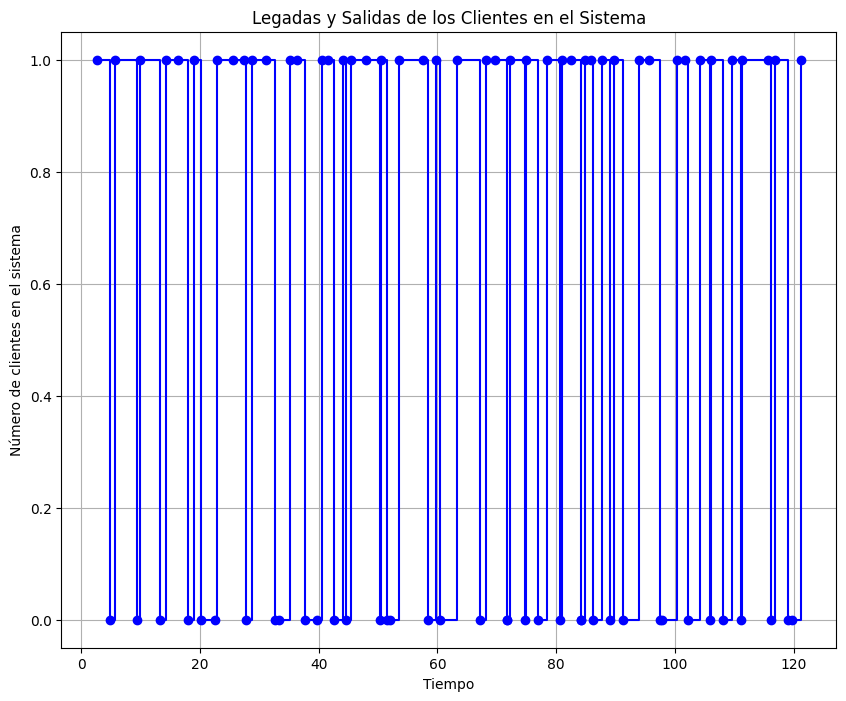

In [108]:
plt.figure(figsize=(10, 8))
# Graficar el número de clientes en el sistema a lo largo del tiempo con plt.step
plt.step(tiempos, clientes_en_sistema,where='post', marker='o', linestyle='-', color='b')
plt.xlabel('Tiempo')
plt.ylabel('Número de clientes en el sistema')
plt.title('Legadas y Salidas de los Clientes en el Sistema')
plt.grid(True)
plt.show()